In [ ]:
!pip install underthesea
!pip install textblob
!pip install wordcloud
!pip install transformers safetensors

In [ ]:
import re
import os
import string
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, timedelta
from wordcloud import WordCloud, STOPWORDS
from underthesea import sent_tokenize, sentiment, word_tokenize, text_normalize

In [86]:
df=pd.read_csv('./Danh_gia.csv')
df.head()

,id,ma_khach_hang,noi_dung_binh_luan,ngay_binh_luan,gio_binh_luan,so_sao,ma_san_pham
0,1,443,"SỬ DỤNG DỄ DÀNG, RẤT THOẢI MÁI, THƯ GIÃN TỘT ĐỘ.",29/04/2023,17:06,5,308500015
1,2,1030,"Sử dụng dễ dãng,rất thoải mái,thư giãn tột độ",30/04/2023,15:04,5,308500015
2,3,689,Mình rất thích hasaki va sp tẩy trang này,30/04/2023,18:34,5,422216594
3,4,2519,Sản phẩm có khả năng làm sạch tốt. Lớp trang đ...,17/07/2022,13:48,5,204100075
4,5,402,"Sữa rửa mặt tốt,sạch mụn,mịn da,đáng mua nha",15/04/2023,23:04,5,422208977


In [87]:
df.shape

(21575, 7)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21575 entries, 0 to 21574
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  21575 non-null  int64 
 1   ma_khach_hang       21575 non-null  int64 
 2   noi_dung_binh_luan  20674 non-null  object
 3   ngay_binh_luan      21575 non-null  object
 4   gio_binh_luan       21575 non-null  object
 5   so_sao              21575 non-null  int64 
 6   ma_san_pham         21575 non-null  int64 
dtypes: int64(4), object(3)
memory usage: 1.2+ MB


In [89]:
df.describe()

,id,ma_khach_hang,so_sao,ma_san_pham
count,21575.000000,21575.000000,21575.000000,2.157500e+04
mean,10788.000000,1648.472491,4.631333,3.211852e+08
std,6228.310365,1194.633858,0.879650,1.114434e+08
min,1.000000,1.000000,0.000000,1.001000e+08
25%,5394.500000,654.000000,5.000000,2.113000e+08
50%,10788.000000,1431.000000,5.000000,3.583000e+08
75%,16181.500000,2439.500000,5.000000,4.222067e+08
max,21575.000000,4735.000000,5.000000,4.222228e+08


In [90]:
df.duplicated().sum()

np.int64(0)

In [91]:
df = df.drop_duplicates()
df = df.dropna()

### Convert Windows-1252 sang UTF-8

In [92]:
def loaddicchar():
    dic = {}
    char1252 = 'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ'
    char1252 = char1252.split('|')
    charutf8 = 'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ'
    charutf8 = charutf8.split('|')
    for i in range(len(char1252)):
        dic[char1252[i]] = charutf8[i]
    return dic

In [93]:
dicchar = loaddicchar()

In [94]:
def covert_unicode(txt):
    return re.sub(r'à|á|ả|ã|ạ|ầ|ấ|ẩ|ẫ|ậ|ằ|ắ|ẳ|ẵ|ặ|è|é|ẻ|ẽ|ẹ|ề|ế|ể|ễ|ệ|ì|í|ỉ|ĩ|ị|ò|ó|ỏ|õ|ọ|ồ|ố|ổ|ỗ|ộ|ờ|ớ|ở|ỡ|ợ|ù|ú|ủ|ũ|ụ|ừ|ứ|ử|ữ|ự|ỳ|ý|ỷ|ỹ|ỵ|À|Á|Ả|Ã|Ạ|Ầ|Ấ|Ẩ|Ẫ|Ậ|Ằ|Ắ|Ẳ|Ẵ|Ặ|È|É|Ẻ|Ẽ|Ẹ|Ề|Ế|Ể|Ễ|Ệ|Ì|Í|Ỉ|Ĩ|Ị|Ò|Ó|Ỏ|Õ|Ọ|Ồ|Ố|Ổ|Ỗ|Ộ|Ờ|Ớ|Ở|Ỡ|Ợ|Ù|Ú|Ủ|Ũ|Ụ|Ừ|Ứ|Ử|Ữ|Ự|Ỳ|Ý|Ỷ|Ỹ|Ỵ',
        lambda x: dicchar[x.group()], 
        txt)


In [95]:
df['noi_dung_binh_luan'].head(10)

0      SỬ DỤNG DỄ DÀNG, RẤT THOẢI MÁI, THƯ GIÃN TỘT ĐỘ.
1         Sử dụng dễ dãng,rất thoải mái,thư giãn tột độ
2             Mình rất thích hasaki va sp tẩy trang này
3     Sản phẩm có khả năng làm sạch tốt. Lớp trang đ...
4          Sữa rửa mặt tốt,sạch mụn,mịn da,đáng mua nha
6     Sau 77 49 dòng srm, thì chân ái là đây, mua tu...
7     Đó giờ mình sài bha của obagi cũng 3-4 chai rồ...
8                            Rất ok mình xài 2 chai rồi
9     Mik bị kich ứng, không hợp sản phẩm, sd được 3...
10    nhân viên tư vấn như mới train và được nhận vì...
Name: noi_dung_binh_luan, dtype: object

In [96]:
df['noi_dung_binh_luan']=df['noi_dung_binh_luan'].apply(lambda x: covert_unicode(str(x)))

In [97]:
df['noi_dung_binh_luan'].head(10)

0      SỬ DỤNG DỄ DÀNG, RẤT THOẢI MÁI, THƯ GIÃN TỘT ĐỘ.
1         Sử dụng dễ dãng,rất thoải mái,thư giãn tột độ
2             Mình rất thích hasaki va sp tẩy trang này
3     Sản phẩm có khả năng làm sạch tốt. Lớp trang đ...
4          Sữa rửa mặt tốt,sạch mụn,mịn da,đáng mua nha
6     Sau 77 49 dòng srm, thì chân ái là đây, mua tu...
7     Đó giờ mình sài bha của obagi cũng 3-4 chai rồ...
8                            Rất ok mình xài 2 chai rồi
9     Mik bị kich ứng, không hợp sản phẩm, sd được 3...
10    nhân viên tư vấn như mới train và được nhận vì...
Name: noi_dung_binh_luan, dtype: object

### Lower

In [98]:
def to_lowercase(text):
    return text.lower()

In [99]:
df['noi_dung_binh_luan']=df['noi_dung_binh_luan'].apply(lambda x: to_lowercase(str(x)))

In [100]:
df['noi_dung_binh_luan'].head(10)

0      sử dụng dễ dàng, rất thoải mái, thư giãn tột độ.
1         sử dụng dễ dãng,rất thoải mái,thư giãn tột độ
2             mình rất thích hasaki va sp tẩy trang này
3     sản phẩm có khả năng làm sạch tốt. lớp trang đ...
4          sữa rửa mặt tốt,sạch mụn,mịn da,đáng mua nha
6     sau 77 49 dòng srm, thì chân ái là đây, mua tu...
7     đó giờ mình sài bha của obagi cũng 3-4 chai rồ...
8                            rất ok mình xài 2 chai rồi
9     mik bị kich ứng, không hợp sản phẩm, sd được 3...
10    nhân viên tư vấn như mới train và được nhận vì...
Name: noi_dung_binh_luan, dtype: object

### Datetime

In [ ]:
def process_text_with_date(text):
    # Tìm ngày tháng trong câu
    date_pattern = r"\b(\d{2}/\d{2}/\d{4})\b"
    match = re.search(date_pattern, text)
    if match:
        # Lấy chuỗi ngày tháng
        date_string = match.group(0)
        # Chuyển đổi sang datetime
        date_obj = datetime.strptime(date_string, "%d/%m/%Y")
        # Tính toán (ví dụ: ngày trong tuần)
        weekday_vietnamese = {
            "Monday": "Thứ Hai",
            "Tuesday": "Thứ Ba",
            "Wednesday": "Thứ Tư",
            "Thursday": "Thứ Năm",
            "Friday": "Thứ Sáu",
            "Saturday": "Thứ Bảy",
            "Sunday": "Chủ Nhật"
        }
        weekday = weekday_vietnamese[date_obj.strftime("%A")]
        # Định dạng ngày đẹp
        formatted_date = date_obj.strftime("Ngày %d tháng %m năm %Y")
        # Thay thế trong câu gốc
        updated_text = text.replace(date_string, f"{formatted_date} ({weekday})")
        return updated_text
    else:
        return text

In [102]:
df['noi_dung_binh_luan']=df['noi_dung_binh_luan'].apply(lambda x: process_text_with_date(str(x)))
df['noi_dung_binh_luan'].head(10)

0      sử dụng dễ dàng, rất thoải mái, thư giãn tột độ.
1         sử dụng dễ dãng,rất thoải mái,thư giãn tột độ
2             mình rất thích hasaki va sp tẩy trang này
3     sản phẩm có khả năng làm sạch tốt. lớp trang đ...
4          sữa rửa mặt tốt,sạch mụn,mịn da,đáng mua nha
6     sau 77 49 dòng srm, thì chân ái là đây, mua tu...
7     đó giờ mình sài bha của obagi cũng 3-4 chai rồ...
8                            rất ok mình xài 2 chai rồi
9     mik bị kich ứng, không hợp sản phẩm, sd được 3...
10    nhân viên tư vấn như mới train và được nhận vì...
Name: noi_dung_binh_luan, dtype: object

### Convert_number

In [162]:
def load_mapping_file(file_path):
    mapping = {}
    with open(file_path, "r", encoding="utf-8") as file:
        for line in file:
            if "#" in line:
                key, value = line.strip().split("#", 1)
                mapping[key] = value
    return mapping

In [163]:
data = {
        "numbers":load_mapping_file("Number.txt"),
        "teencode": load_mapping_file("Teencode.txt")
        }
data

{'numbers': {'0': 'không',
  '1': 'một',
  '2': 'hai',
  '3': 'ba',
  '4': 'bốn',
  '5': 'năm',
  '6': 'sáu',
  '7': 'bảy',
  '8': 'tám',
  '9': 'chín'},
 'teencode': {'bạk': 'bạch',
  'bưc': 'bức',
  'bùl': 'buồn',
  'nếnh': 'nến',
  'byt': 'buýt',
  'cak': 'cách',
  'cẻ': 'kẻ',
  'cik': 'kinh',
  'oxi': 'ô xi',
  'oxy': 'ô xi',
  'axit': 'a xít',
  'cín': 'kín',
  'cìw': 'kiều',
  'côt': 'cốt',
  'cũg': 'cũng',
  'dáh': 'đánh',
  'dấy': 'đấy',
  'dìw': 'điều',
  'dồ': 'đồ',
  'dôg': 'đông',
  'dọg': 'đọng',
  'dớn': 'đớn',
  'dừz': 'đường',
  'fẳg': 'phẳng',
  'fải': 'phải',
  'fân': 'phân',
  'fố': 'phố',
  'fog': 'phong',
  'fưz': 'phfương',
  'fựz': 'phượng',
  'ge': 'ghe',
  'gế': 'ghế',
  'gen': 'ghen',
  'hồg': 'hồng',
  'ja': 'gia',
  'já': 'giá',
  'jà': 'già',
  'jấy': 'giấy',
  'jì': 'gì',
  'jìn': 'gìn',
  'jờ': 'giờ',
  'jở': 'giở',
  'jòg': 'giòng',
  'jù': 'dù',
  'jữ': 'giữ',
  'kăn': 'khăn',
  'ken': 'khen',
  'ki': 'khi',
  'kó': 'khó',
  'kôg': 'không',
  'lặg': 'lặ

In [ ]:
def convert_number(text):
    def number_to_words(match):
        num = match.group(0)
        length = len(num)

        def two_digits_to_words(n):
            tens = data["numbers"][n[0]] + " mươi"
            units = data["numbers"][n[1]]
            if n[1] == '0':  # Tròn chục
                return tens
            elif n[1] == '5':  # Lăm thay vì năm
                return tens + " lăm"
            else:
                return tens + " " + units

        def three_digits_to_words(n):
            hundreds = data["numbers"][n[0]] + " trăm"
            if n[1] == '0' and n[2] == '0':  # Tròn trăm
                return hundreds
            if n[1] == '0':  # Trường hợp hàng chục là 0
                return hundreds + " lẻ " + data["numbers"][n[2]]
            return hundreds + " " + two_digits_to_words(n[1:])

        def large_number_to_words(n):
            thousands = data["numbers"][n[0]] + " nghìn"
            remainder = n[1:]
            if remainder == "000":  # Tròn nghìn
                return thousands
            if len(remainder) == 3:
                return thousands + " " + three_digits_to_words(remainder)
            if len(remainder) == 2:
                return thousands + " " + two_digits_to_words(remainder)
            return thousands + " lẻ " + data["numbers"][remainder[0]]

        # Xử lý từng trường hợp dựa vào độ dài
        if length == 1:  # Một chữ số
            return data["numbers"][num]
        elif length == 2:  # Hai chữ số
            return two_digits_to_words(num)
        elif length == 3:  # Ba chữ số
            return three_digits_to_words(num)
        elif length == 4:  # Bốn chữ số
            return large_number_to_words(num)
        else:
            return num  # Giữ nguyên nếu vượt quá giới hạn
    text = re.sub(r'\b\d+\b', number_to_words, text)
    return text

In [108]:
df['noi_dung_binh_luan']=df['noi_dung_binh_luan'].apply(lambda x: convert_number(str(x)))

In [109]:
df['noi_dung_binh_luan'].head(10)

0      sử dụng dễ dàng, rất thoải mái, thư giãn tột độ.
1         sử dụng dễ dãng,rất thoải mái,thư giãn tột độ
2             mình rất thích hasaki va sp tẩy trang này
3     sản phẩm có khả năng làm sạch tốt. lớp trang đ...
4          sữa rửa mặt tốt,sạch mụn,mịn da,đáng mua nha
6     sau bảy mươi bảy bốn mươi chín dòng srm, thì c...
7     đó giờ mình sài bha của obagi cũng ba-bốn chai...
8                          rất ok mình xài hai chai rồi
9     mik bị kich ứng, không hợp sản phẩm, sd được 3...
10    nhân viên tư vấn như mới train và được nhận vì...
Name: noi_dung_binh_luan, dtype: object

### Convert teencode

In [ ]:
def convert_teencode(text): 
    for key, value in data["teencode"].items():
        text = re.sub(rf"\b{re.escape(key)}\b", value, text) 
    return text

In [111]:
df['noi_dung_binh_luan']=df['noi_dung_binh_luan'].apply(lambda x: convert_teencode(str(x)))

In [112]:
df['noi_dung_binh_luan'].head(10)

0      sử dụng dễ dàng, rất thoải mái, thư giãn tột độ.
1         sử dụng dễ dãng,rất thoải mái,thư giãn tột độ
2             mình rất thích hasaki va sp tẩy trang này
3     sản phẩm có khả năng làm sạch tốt. lớp trang đ...
4          sữa rửa mặt tốt,sạch mụn,mịn da,đáng mua nha
6     sau bảy mươi bảy bốn mươi chín dòng srm, thì c...
7     đó giờ mình sài bha của obagi cũng ba-bốn chai...
8                          rất ok mình xài hai chai rồi
9     mình bị kich ứng, không hợp sản phẩm, sd được ...
10    nhân viên tư vấn như mới train và được nhận vì...
Name: noi_dung_binh_luan, dtype: object

### Remove token

In [ ]:
def remove_token(x):
    x = x.lower()
    # giu lai cac ky tu dac biet trong tieng viet
    reg=r'[a-zA-Zàáạảãâầấậẩẫăằắặẳẵèéẹẻẽêềếệểễìíịỉĩòóọỏõôồốộổỗơờớợởỡùúụủũưừứựửữỳýỵỷỹđ ]+'
    y = re.findall(reg,x)
    x = ' '.join(y)
    return x

In [114]:
x='hi em,! cho anh lam quen nha @#$!'
remove_token(x)

'hi em  cho anh lam quen nha '

In [115]:
df.columns

Index(['id', 'ma_khach_hang', 'noi_dung_binh_luan', 'ngay_binh_luan',
       'gio_binh_luan', 'so_sao', 'ma_san_pham'],
      dtype='object')

In [117]:
df['noi_dung_binh_luan'] = df['noi_dung_binh_luan'].apply(lambda x:(remove_token(str(x))))

In [118]:
df['noi_dung_binh_luan'].head(10)

0       sử dụng dễ dàng  rất thoải mái  thư giãn tột độ
1         sử dụng dễ dãng rất thoải mái thư giãn tột độ
2             mình rất thích hasaki va sp tẩy trang này
3     sản phẩm có khả năng làm sạch tốt  lớp trang đ...
4          sữa rửa mặt tốt sạch mụn mịn da đáng mua nha
6     sau bảy mươi bảy bốn mươi chín dòng srm  thì c...
7     đó giờ mình sài bha của obagi cũng ba bốn chai...
8                          rất ok mình xài hai chai rồi
9     mình bị kich ứng  không hợp sản phẩm  sd được ...
10    nhân viên tư vấn như mới train và được nhận vì...
Name: noi_dung_binh_luan, dtype: object

In [119]:
def list_files_in_directory(directory):
    try:
        items = os.listdir(directory)
        files = [item for item in items if os.path.isfile(os.path.join(directory, item))]
        print("Danh sách các file trong thư mục:")
        for file in files:
            print(file)
        return files
    except FileNotFoundError:
        print(f"Thư mục '{directory}' không tồn tại.")
    except PermissionError:
        print(f"Không có quyền truy cập thư mục '{directory}'.")
    except Exception as e:
        print(f"Đã xảy ra lỗi: {e}")

directory_path = "C:/Users/hoduy/Downloads/danh_gia_tieng_viet" 
files = list_files_in_directory(directory_path)
files[-1]

Danh sách các file trong thư mục:
cleandata.ipynb
Danh_gia.csv
emojicon.txt
model.safetensors
Number.txt
process_data.ipynb
RegexRule.zip
Sentimentanalysis.ipynb
Teencode.txt
vietnamese-stopwords.txt


'vietnamese-stopwords.txt'

In [120]:
df['noi_dung_binh_luan'].head(10)

0       sử dụng dễ dàng  rất thoải mái  thư giãn tột độ
1         sử dụng dễ dãng rất thoải mái thư giãn tột độ
2             mình rất thích hasaki va sp tẩy trang này
3     sản phẩm có khả năng làm sạch tốt  lớp trang đ...
4          sữa rửa mặt tốt sạch mụn mịn da đáng mua nha
6     sau bảy mươi bảy bốn mươi chín dòng srm  thì c...
7     đó giờ mình sài bha của obagi cũng ba bốn chai...
8                          rất ok mình xài hai chai rồi
9     mình bị kich ứng  không hợp sản phẩm  sd được ...
10    nhân viên tư vấn như mới train và được nhận vì...
Name: noi_dung_binh_luan, dtype: object

### Remove stopword

In [121]:
stopWord = pd.read_csv(files[-1], header=None, encoding="utf-8")
stopWord.head()

,0
0,a lô
1,a ha
2,ai
3,ai ai
4,ai nấy


In [122]:
df['noi_dung_binh_luan']

0          sử dụng dễ dàng  rất thoải mái  thư giãn tột độ
1            sử dụng dễ dãng rất thoải mái thư giãn tột độ
2                mình rất thích hasaki va sp tẩy trang này
3        sản phẩm có khả năng làm sạch tốt  lớp trang đ...
4             sữa rửa mặt tốt sạch mụn mịn da đáng mua nha
                               ...                        
21570    dùng sp này bị ghiền luôn  hạt siêu mịn  mùi t...
21571    mua nhiều lần ở đây rồi ạ  sản phẩm ok  giá rẻ...
21572      sản phẩm có một số hạn chế  không thực sự ưng ý
21573    dùng kem này từ hai năm trước  kem sáng da trắ...
21574    chất đặt dùng rất hợp cho da khô e này thiên v...
Name: noi_dung_binh_luan, Length: 20674, dtype: object

In [123]:
def remove_stopWord(x,y):
    # chi lay nhung tu khong nam trong y moi duoc duyet
    x = [word for word in x if word not in y]
    x = ''.join(x)
    return x

In [124]:
df['noi_dung_binh_luan']=df['noi_dung_binh_luan'].apply(lambda x: remove_stopWord(str(x), stopWord))

In [125]:
df['noi_dung_binh_luan'].head(10)

0       sử dụng dễ dàng  rất thoải mái  thư giãn tột độ
1         sử dụng dễ dãng rất thoải mái thư giãn tột độ
2             mình rất thích hasaki va sp tẩy trang này
3     sản phẩm có khả năng làm sạch tốt  lớp trang đ...
4          sữa rửa mặt tốt sạch mụn mịn da đáng mua nha
6     sau bảy mươi bảy bốn mươi chín dòng srm  thì c...
7     đó giờ mình sài bha của obagi cũng ba bốn chai...
8                          rất ok mình xài hai chai rồi
9     mình bị kich ứng  không hợp sản phẩm  sd được ...
10    nhân viên tư vấn như mới train và được nhận vì...
Name: noi_dung_binh_luan, dtype: object

###  Remove character

In [126]:
def remove_character(x):
    return re.sub(r'(.)\1+', r'\1', x)

In [127]:
df['noi_dung_binh_luan'] = df['noi_dung_binh_luan'].apply(lambda x: remove_character(x))

### Duplicate - Emoji

In [129]:
def load_emoji_dict(file_path):
    emoji_dict = {}
    with open(file_path, "r", encoding="utf-8") as file:
        for line in file:
            parts = line.strip().split("\t")  # Tách emoji và ý nghĩa
            if len(parts) == 2:
                emoji, meaning = parts
                emoji_dict[emoji] = meaning
    return emoji_dict
emoji_dict = load_emoji_dict(files[2])


In [130]:
emoji_dict

{'❤': 'yêu',
 '👍': 'thích',
 '😍': 'cười',
 '😊': 'cười',
 '😘': 'cười',
 '🥰': 'cười',
 '😁': 'cười',
 '😤': 'tức',
 '👌': 'thích',
 '⭐': 'thích',
 '🌟': 'thích',
 '♥': 'yêu',
 '☺': 'cười',
 '😂': 'cười',
 '😀': 'cười',
 '💕': 'yêu',
 '😗': 'thích',
 '🤗': 'cười',
 '😉': 'cười',
 '😃': 'cười',
 '👏': 'chúc mừng',
 '😄': 'cười',
 '😋': 'cười',
 '🤩': 'cười',
 '🙂': 'cười',
 '🤣': 'cười',
 '👎': 'tệ',
 '😆': 'cười',
 '💖': 'yêu',
 '😡': 'giận dữ',
 '😎': 'cười',
 '😚': 'thích',
 '💚': 'yêu',
 '😙': 'thích',
 '💙': 'yêu',
 '💛': 'yêu',
 '😓': 'bùn',
 '😢': 'khóc',
 '😭': 'khóc ròng',
 '☹': 'bùn',
 '😫': 'mệt mỏi',
 '💗': 'yêu',
 '🖤': 'yêu',
 '😣': 'giận dữ',
 '🧡': 'yêu'}

In [ ]:
def clean_text(text, emoji_dict):
    # Thay thế emoji bằng chuỗi rỗng để loại bỏ
    for emoji, _ in emoji_dict.items():
        text = text.replace(emoji, " _ ")

    # Loại bỏ các ký tự không mong muốn còn sót từ emoji (như ký tự `️`)
    text = re.sub(r"[️]+", " ", text)  # Xóa các ký tự còn sót

    # Chuẩn hóa khoảng trắng xung quanh dấu câu
    text = re.sub(r"(\w)\s*([" + string.punctuation + "])\s*(\w)", r"\1 \2 \3", text)
    text = re.sub(r"(\w)\s*([" + string.punctuation + "])", r"\1 \2", text)

    # Giảm bớt dấu câu liên tiếp
    # Loại bỏ các ký tự thừa ở đầu và cuối
    # Loại bỏ toàn bộ dấu câu còn lại
    # Chuẩn hóa khoảng trắng
    text = re.sub(f"([{string.punctuation}])([{string.punctuation}])+", r"\1", text)
    text = text.strip(string.punctuation + string.whitespace)
    text = text.translate(str.maketrans("", "", string.punctuat ion))
    text = " ".join(text.split())

    # Loại bỏ các dấu `_` liên tiếp
    text = re.sub(r"(_\s*)+", "", text)
    text = text_normalize(text) 
    return text

In [ ]:
sample_text = "Tôi rất vui 😊 và thích nó 👍, nhưng cũng hơi bùn 😢."
cleaned_text = clean_text(sample_text, emoji_dict)
cleaned_text

'Tôi rất vui và thích nó nhưng cũng hơi bùn'

In [134]:
a='anh yêu em lắm ❤️❤️❤️❤️, nhưng anh cũng rất yêu nhỏ đó,anh xin lỗi em.... rất nhiều.   '
clean_text(a,emoji_dict)

'anh yêu em lắm nhưng anh cũng rất yêu nhỏ đó anh xin lỗi em rất nhiều'

In [135]:
x="sử dụng ko bé iu"
clean_text(x,emoji_dict)

'sử dụng ko bé iu'

In [136]:
df['noi_dung_binh_luan'].head(10)

0         sử dụng dễ dàng rất thoải mái thư giãn tột độ
1         sử dụng dễ dãng rất thoải mái thư giãn tột độ
2             mình rất thích hasaki va sp tẩy trang này
3     sản phẩm có khả năng làm sạch tốt lớp trang đi...
4          sữa rửa mặt tốt sạch mụn mịn da đáng mua nha
6     sau bảy mươi bảy bốn mươi chín dòng srm thì ch...
7     đó giờ mình sài bha của obagi cũng ba bốn chai...
8                          rất ok mình xài hai chai rồi
9     mình bị kich ứng không hợp sản phẩm sd được ng...
10    nhân viên tư vấn như mới train và được nhận vì...
Name: noi_dung_binh_luan, dtype: object

In [ ]:
df['noi_dung_binh_luan']=df['noi_dung_binh_luan'].apply((lambda x: clean_text(x, emoji_dict)))

In [138]:
df['noi_dung_binh_luan'].head(10)

0         sử dụng dễ dàng rất thoải mái thư giãn tột độ
1         sử dụng dễ dãng rất thoải mái thư giãn tột độ
2             mình rất thích hasaki va sp tẩy trang này
3     sản phẩm có khả năng làm sạch tốt lớp trang đi...
4          sữa rửa mặt tốt sạch mụn mịn da đáng mua nha
6     sau bảy mươi bảy bốn mươi chín dòng srm thì ch...
7     đó giờ mình sài bha của obagi cũng ba bốn chai...
8                          rất ok mình xài hai chai rồi
9     mình bị kich ứng không hợp sản phẩm sd được ng...
10    nhân viên tư vấn như mới train và được nhận vì...
Name: noi_dung_binh_luan, dtype: object

### Visualization

### Start - Original

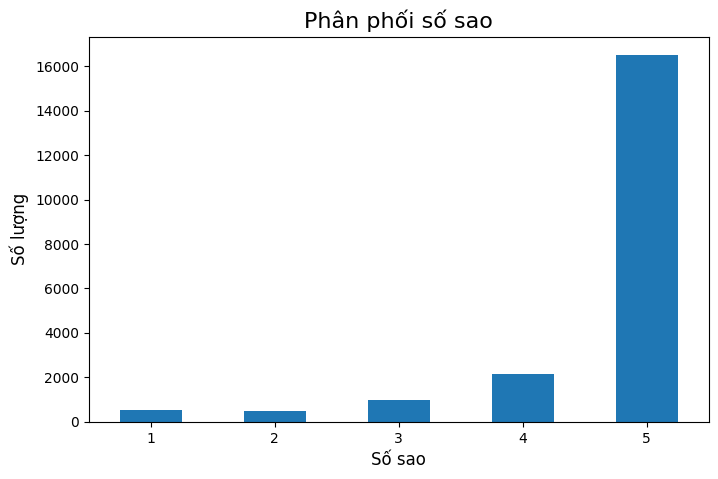

In [ ]:
value_counts = df['so_sao'].value_counts()
value_counts.sort_index().plot(kind='bar', figsize=(8, 5))

plt.title('Phân phối số sao', fontsize=16)
plt.xlabel('Số sao', fontsize=12)
plt.ylabel('Số lượng', fontsize=12)
plt.xticks(rotation=0)
plt.show()


### Phân loại theo trung tích - tích cực - tiêu cực thông qua số sao

In [140]:
def add_column_star(x):
    if x <= 1:
        x= 1
    elif x >1 and x <=3:
        x=2
    else:
        x=3
    return x

In [141]:
df['label_star']=df['so_sao'].apply(lambda x: add_column_star((x)))
df['label_star'].value_counts().sort_index()

label_star
1      544
2     1480
3    18650
Name: count, dtype: int64

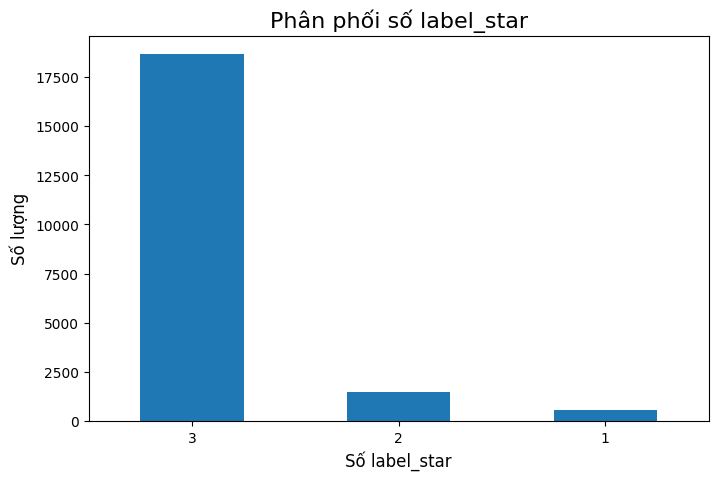

In [ ]:
value_counts = df['label_star'].value_counts()
value_counts.sort_index().plot(kind='bar', figsize=(8, 5))

plt.title('Phân phối số label_star', fontsize=16)
plt.xlabel('Số label_star', fontsize=12)
plt.ylabel('Số lượng', fontsize=12)
plt.xticks(rotation=0)
plt.show()


### Từ phổ biến trong ba cột

In [ ]:
def plot_word_cloud(data, typ, output_file):
    # Gộp nội dung từ cột 'noi_dung_binh_luan'
    email_corpus = " ".join(data['noi_dung_binh_luan'])
    
    # Lưu từng từ vào file, mỗi từ trên một dòng
    with open(output_file, 'w', encoding='utf-8') as file:
        words = email_corpus.split()  # Tách các từ trong nội dung
        file.write("\n".join(words))  # Ghi từng từ vào một dòng
    
    # Tạo đám mây
    plt.figure(figsize=(7, 7))
    wc = WordCloud(background_color='black',
                   max_words=100,
                   width=800,
                   height=400,
                   collocations=False).generate(email_corpus)
    plt.imshow(wc, interpolation='bilinear')
    plt.title(f'WordCloud for {typ} emails', fontsize=15)
    plt.show()

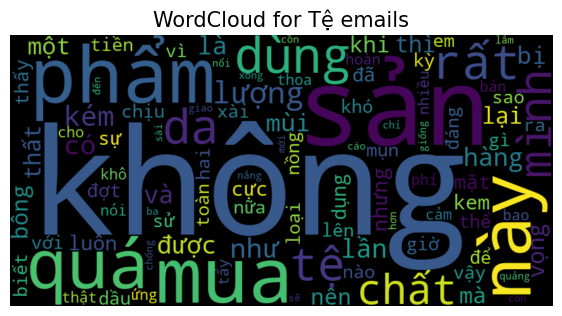

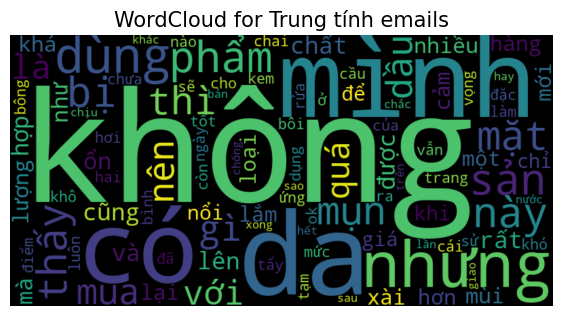

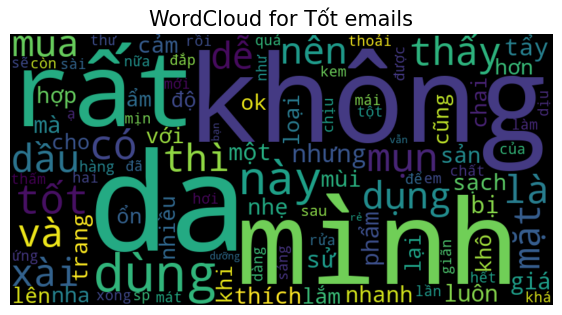

In [144]:
plot_word_cloud(df[df['label_star'] == 1], typ='Tệ', output_file='te_comments.txt')
plot_word_cloud(df[df['label_star'] == 2], typ='Trung tính', output_file='trung_tinh_comments.txt')
plot_word_cloud(df[df['label_star'] == 3], typ='Tốt', output_file='tot_comments.txt')

### Gán label

In [147]:
df.head()

,id,ma_khach_hang,noi_dung_binh_luan,ngay_binh_luan,gio_binh_luan,so_sao,ma_san_pham,label_star
0,1,443,sử dụng dễ dàng rất thoải mái thư giãn tột độ,29/04/2023,17:06,5,308500015,3
1,2,1030,sử dụng dễ dãng rất thoải mái thư giãn tột độ,30/04/2023,15:04,5,308500015,3
2,3,689,mình rất thích hasaki va sp tẩy trang này,30/04/2023,18:34,5,422216594,3
3,4,2519,sản phẩm có khả năng làm sạch tốt lớp trang đi...,17/07/2022,13:48,5,204100075,3
4,5,402,sữa rửa mặt tốt sạch mụn mịn da đáng mua nha,15/04/2023,23:04,5,422208977,3


### Vietnamese-Sentiment-visobert

In [149]:
from transformers import pipeline
model_path = '5CD-AI/Vietnamese-Sentiment-visobert'
sentiment_task = pipeline("sentiment-analysis", model=model_path, tokenizer=model_path)
sentiment_task("Miếng dán dễ xước , ko khít với dt 11 prm")

[{'label': 'NEG', 'score': 0.998149037361145}]

In [ ]:
def predict_sentiment(text):
    try:
        result = sentiment_task(text)[0] 
        print(result['label'])
    except Exception as e:
        return None
    return result['label'] 

In [155]:
df['label_sentiment'] = df['noi_dung_binh_luan'].apply(predict_sentiment)

POS
POS
POS
POS
POS
POS
NEG
POS
NEG
NEG
POS
POS
POS
NEG
POS
NEG
POS
POS
POS
POS
POS
POS
POS
POS
POS
POS
NEG
POS
POS
POS
POS
POS
POS
POS
POS
POS
NEG
POS
POS
POS
POS
POS
NEG
POS
POS
POS
NEG
NEG
NEG
POS
POS
POS
POS
NEG
POS
POS
POS
POS
POS
POS
POS
NEG
POS
POS
POS
POS
POS
POS
NEG
POS
NEG
POS
NEG
NEU
POS
POS
POS
POS
POS
POS
POS
POS
POS
POS
POS
POS
NEG
POS
POS
POS
NEG
POS
POS
POS
POS
POS
NEG
POS
POS
NEG
POS
POS
POS
NEG
NEG
POS
POS
POS
POS
POS
POS
POS
POS
NEG
POS
POS
POS
NEG
POS
POS
NEG
POS
POS
POS
NEG
NEG
POS
POS
POS
POS
POS
POS
POS
NEU
NEG
POS
NEG
NEG
NEG
POS
NEG
POS
POS
POS
POS
POS
POS
POS
POS
POS
POS
POS
POS
POS
POS
NEU
NEG
POS
POS
POS
POS
NEG
POS
POS
POS
NEG
POS
POS
POS
POS
POS
POS
NEG
POS
POS
POS
NEG
POS
POS
NEG
POS
POS
NEG
POS
POS
POS
POS
POS
POS
NEG
POS
POS
POS
POS
POS
POS
POS
POS
POS
POS
POS
POS
POS
POS
POS
POS
POS
POS
POS
POS
POS
NEG
POS
POS
POS
POS
POS
POS
POS
NEG
POS
POS
POS
NEG
POS
POS
POS
POS
POS
POS
POS
POS
POS
POS
POS
POS
POS
POS
POS
POS
POS
NEG
POS
POS
POS
POS
NEU
POS
POS
POS


In [156]:
df['label_sentiment'].value_counts()

label_sentiment
POS    17024
NEG     3269
NEU      379
Name: count, dtype: int64

### Store data

In [ ]:
df.to_csv('Danh_gia_processing_final_training.csv', index=False) 